<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>

# Image Basics Assessment

## Complete the Tasks in bold below. Keep in mind, you may need to run some of these tasks as Python scripts.

----------
#### TASK: Open the *dog_backpack.jpg* image from the DATA folder and display it in the notebook. Make sure to correct for the RGB order.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
img = cv2.imread('..\DATA\dog_backpack.jpg')

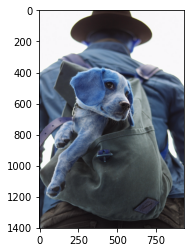

In [3]:
plt.imshow(img)

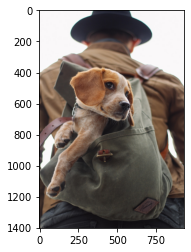

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

#### TASK: Flip the image upside down and display it in the notebook.

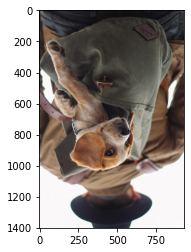

In [8]:
flip_img = cv2.flip(img_rgb, 0)
plt.imshow(flip_img)

#### TASK: Draw an empty RED rectangle around the dogs face and display the image in the notebook.

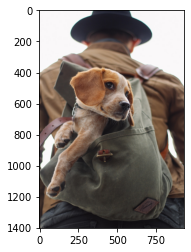

In [17]:
img_rgb_rectangle = img_rgb.copy()
plt.imshow(img_rgb_rectangle)

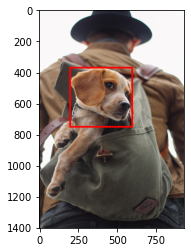

In [18]:
cv2.rectangle(img_rgb_rectangle, pt1=(200,370), pt2=(600,750), color=(255,0,0), thickness= 10)
plt.imshow(img_rgb_rectangle)

#### TASK: Draw a BLUE TRIANGLE in the middle of the image. The size and angle is up to you, but it should be a triangle (three sides) in any orientation.

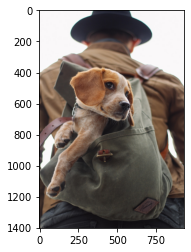

In [19]:
img_rgb_triangle = img_rgb.copy()
plt.imshow(img_rgb_triangle)

The triangle will be an equilateral triangle.

**Creating the vertices:** First, the shape variable are going to be obtained since the trinagle will be in exact center. 

In [25]:
height, width, channels = img_rgb.shape
print("height = " + str(height))
print("width = " + str(width))
center_x,center_y = width/2,height/2
print("center = (" + str(center_x) + "," + str(center_y) + ")")

height = 1401
width = 934
center = (467.0,700.5)


Define the lenght from the center to every vertice.

In [27]:
length = 300

Now, the vertices will be specified:

In [31]:
x = length*np.cos(np.pi/6)
y = length*0.5
print("x = " + str(x))
print("y = " + str(y))

x = 259.8076211353316
y = 150.0


In [32]:
vertice_up = [center_x, center_y - length]
vertice_right = [center_x+x, center_y+y]
vertice_left = [center_x-x,center_y+y]

In [34]:
vertices = np.array([vertice_up, vertice_right, vertice_left], np.int32)
vertices

array([[467, 400],
       [726, 850],
       [207, 850]])

A matrix 3x1 with vectors 1x2 as elements:

In [36]:
pts = vertices.reshape((-1,1,2))
pts

array([[[467, 400]],

       [[726, 850]],

       [[207, 850]]])

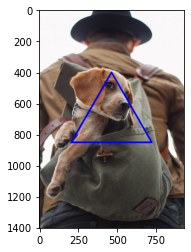

In [41]:
cv2.polylines(img_rgb_triangle,[pts],isClosed=True,color=(0,0,255),thickness=10)
plt.imshow(img_rgb_triangle)

### BONUS TASK. Can you figure our how to fill in this triangle? It requires a different function that we didn't show in the lecture! See if you can use google search to find it.

[CLICK ME FOR A DIRECT LINK TO THE HINT](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#fillpoly)

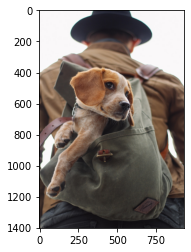

In [50]:
img_rgb_triangle_fill = img_rgb.copy()
plt.imshow(img_rgb_triangle_fill)

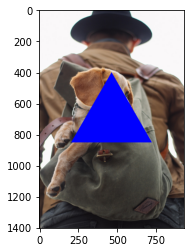

In [51]:
cv2.fillPoly(img_rgb_triangle_fill,[pts],color=(0,0,255))
plt.imshow(img_rgb_triangle_fill)

#### TASK: (NOTE: YOU WILL NEED TO RUN THIS AS A SCRIPT). Create a script that opens the picture and allows you to draw empty red circles whever you click the RIGHT MOUSE BUTTON DOWN.

In [ ]:
import numpy as np
import cv2

def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img,(x,y),100,(0,0,255),thickness=4)        

img = cv2.imread('..\DATA\dog_backpack.jpg')
cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing',draw_circle)

while True: # Runs forever until we break with Esc key on keyboard
    cv2.imshow('my_drawing',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()